In [175]:
import numpy as np
import random
from itertools import product
import matplotlib.pyplot as plt

In [176]:
def prob_infection(d, capacity):
    I = 1
    q = 0.238
    p = 0.3 / 60
    Q = 10 * 0.01 * capacity
    t = 2 * 60 * 60
    
    P_d = (-18.19 * np.log(d) + 44.276) / 100
    P_i = 1 - np.exp(-P_d * ((I * q * p * t) / Q))
    return P_i if P_i >= 0 else 0

In [177]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2  + (y1 - y2) ** 2)

In [178]:
def generate_sitting_array(social_distancing):
    # Distance between two people siting side (the centers of their chairs) is 50cm/0.5m
    # The distance across a walkway is 2m (1.5m walk + distance from center of chairs)
    # Grid at 0.5m distances
    south_one_sitting = np.array(
        [
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
        ]
    )

    social_distancing = int(social_distancing * 2)

    for i in range(south_one_sitting.shape[0]):
        top_bound = i - social_distancing if i - social_distancing >= 0 else 0
        bottom_bound = (
            i + social_distancing
            if i + social_distancing <= south_one_sitting.shape[0] - 1
            else south_one_sitting.shape[0] - 1
        )

        for j in range(south_one_sitting.shape[1]):
            if south_one_sitting[i, j] == 1:
                left_bound = j - social_distancing if j - social_distancing >= 0 else 0
                right_bound = (
                    j + social_distancing
                    if j + social_distancing <= south_one_sitting.shape[1] - 1
                    else south_one_sitting.shape[1] - 1
                )

                square_of_interest = south_one_sitting[top_bound:bottom_bound, left_bound:right_bound]
                for k, l in product(range(square_of_interest.shape[0]), range(square_of_interest.shape[1])):
                    if (
                        distance(top_bound + k, left_bound + l, i, j) < social_distancing
                        and square_of_interest[k, l] == 2
                    ):
                        break
                else:
                    south_one_sitting[i, j] = 2

    plt.imshow(south_one_sitting)

    return south_one_sitting


In [179]:
def generate_map(canvas, sitting_array):
    accum = 1
    
    for i in range(sitting_array.shape[0]):
        for j in range(sitting_array.shape[1]):
            if sitting_array[i, j] == 2:
                canvas.node(accum).add()
                canvas.edges(((accum, node) for node in range(1, accum))).add()
                accum += 1

In [180]:
def random_trigger(prob):
    return random.uniform(0.0, 1.0) <= prob

In [181]:
prob_infection(3, 296 + 1)

0.06768024547354012

In [182]:
random.uniform(0.0, 1.0)

0.6950468565063604

In [203]:
SOCIAL_DISTANCING = 5

25

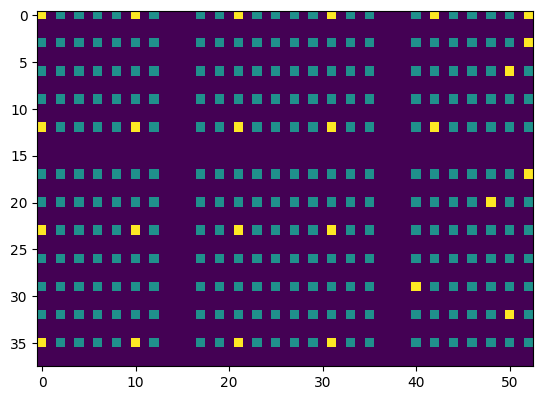

In [204]:
sitting_array = generate_sitting_array(SOCIAL_DISTANCING)
(sitting_array == 2).sum()

0.00016298200845171385
------------ new attempt ------------


C:\Users\Nisha\AppData\Local\Temp\ipykernel_49000\2082262766.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


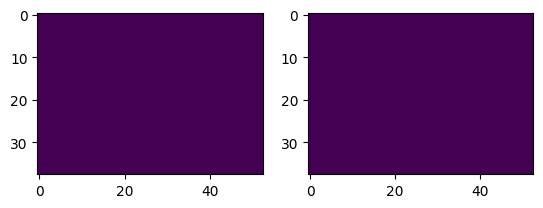

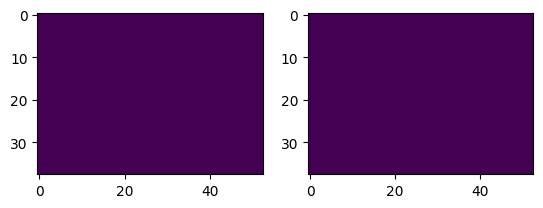

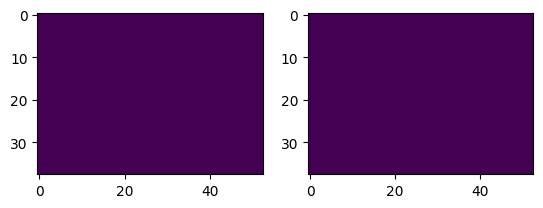

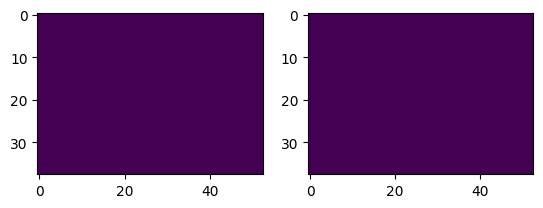

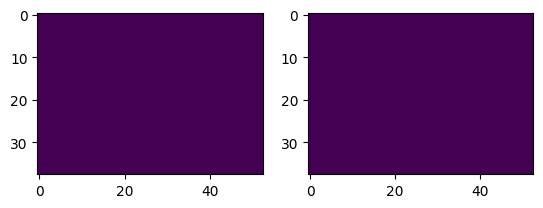

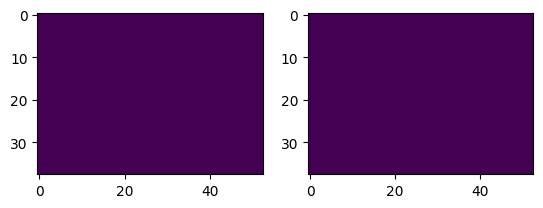

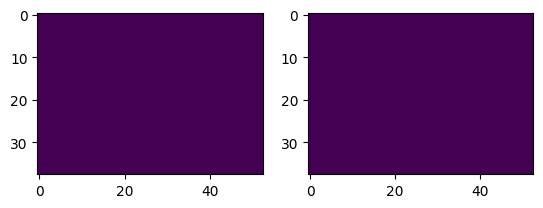

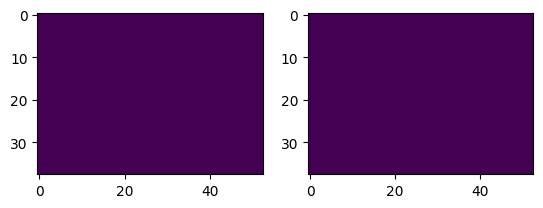

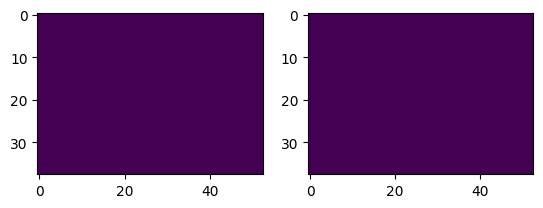

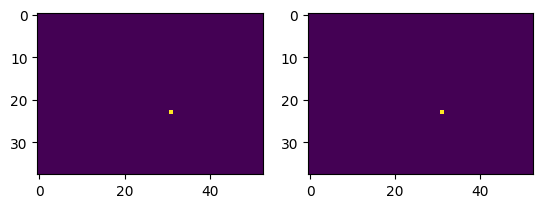

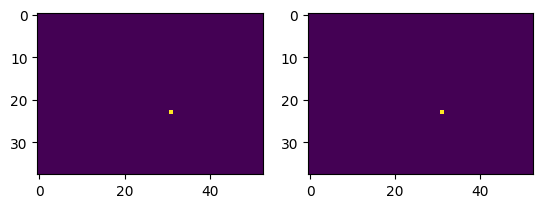

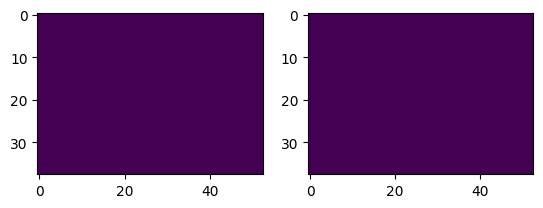

In [205]:
EXTERNAL_INFECTION_PROB = 7594 / 7 / 6_656_300 # Infection data / population data (abs)
print(EXTERNAL_INFECTION_PROB)

CAPACITY = 296 + 1
INFECTIOUS_PERIOD = 10
# NUM_STUDENT = (sitting_array == 2).sum()

tmp_sitting_array = sitting_array.copy()
uninfected = np.argwhere(sitting_array == 2).tolist()
infected = {i: [] for i in range(1, INFECTIOUS_PERIOD + 1)}
resistant = []
external_infection = 0

while len(resistant) == 0:
    print("------------ new attempt ------------")
    for week in range(1, 13):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        
        for _ in range(7):
            for student in uninfected.copy():
                if random_trigger(EXTERNAL_INFECTION_PROB):
                    infected[INFECTIOUS_PERIOD].append(student)
                    uninfected.remove(student)
                    tmp_sitting_array[student[0], student[1]] = 3
                    external_infection += 1
            
            resistant.extend(infected[1])
            for i in range(1, INFECTIOUS_PERIOD):
                infected[i] = infected[i+1]
            infected[INFECTIOUS_PERIOD] = []
        
        for x, y in resistant:
            tmp_sitting_array[x, y] = 4
        
        ax1.imshow(tmp_sitting_array == 3)
        
        for i in range(INFECTIOUS_PERIOD, 0, -1):
            for infector in infected[i].copy():
                for infectable in uninfected.copy():
                    d = distance(infector[0], infector[1], infectable[0], infectable[1]) / 2
                    P_i = prob_infection(d, CAPACITY)
                    if random_trigger(P_i):
                        infected[INFECTIOUS_PERIOD].append(infectable)
                        uninfected.remove(infectable)
                        tmp_sitting_array[infectable[0], infectable[1]] = 3
                        print(infectable, P_i, d)
                        
        ax2.imshow(tmp_sitting_array == 3)
        fig.show()

In [206]:
print(f"Transmission factor = {(len(resistant) - external_infection) / len(uninfected)}")
print(len(uninfected))

Transmission factor = 0.0
24
